## Digit Recognizer
https://www.kaggle.com/c/digit-recognizer

In [1]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Загружаем исходные данные

In [2]:
train = np.loadtxt('./data/digit/train.csv', delimiter=',', skiprows=1)
test = np.loadtxt('./data/digit/test.csv', delimiter=',', skiprows=1)

In [3]:
# сохраняем разметку в отдельную переменную
train_label = train[:, 0]
# приводим размерность к удобному для обаботки виду
train_img = np.resize(train[:, 1:], (train.shape[0], 28, 28, 1))
test_img = np.resize(test, (test.shape[0], 28, 28, 1))

## Визуализируем исходные данные

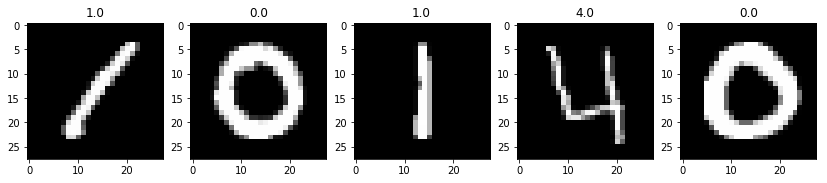

In [4]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(train_img[0:5,:,:,0], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % train_label[i - 1]);

## Разбиваем выборку на обучение и валидацию

In [5]:
from sklearn.model_selection import train_test_split
y_train, y_val, x_train, x_val = train_test_split(
    train_label, train_img, test_size=0.2, random_state=42)

In [6]:
x_train.shape

(33600, 28, 28, 1)

In [7]:
import keras

Using TensorFlow backend.


In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(kernel_size=(3,3),filters=16, input_shape=x_train.shape[1:], padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(kernel_size=(3,3),filters=32, padding='same', activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(kernel_size=(3,3),filters=64, padding='valid', activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.15))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1600)              0         
__________

In [21]:
from keras.utils import np_utils
y_train_labels = np_utils.to_categorical(y_train)

In [22]:
model.fit(x_train, y_train_labels, batch_size=64,epochs=10)

Epoch 1/10
33600/33600 [==============================] - 15s - loss: 0.6419 - acc: 0.9094       

In [23]:
pred_val = model.predict_classes(x_val)

8288/8400 [============================>.] - ETA: 0s

In [24]:
from sklearn.metrics import accuracy_score
print('Accuracy: %s' % accuracy_score(y_val, pred_val))

Accuracy: 0.98619047619


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_val, pred_val))

             precision    recall  f1-score   support

        0.0       1.00      0.98      0.99       816
        1.0       0.99      0.99      0.99       909
        2.0       0.97      0.99      0.98       846
        3.0       1.00      0.99      0.99       937
        4.0       0.99      0.98      0.99       839
        5.0       0.98      0.99      0.98       702
        6.0       0.97      1.00      0.98       785
        7.0       0.99      0.99      0.99       893
        8.0       0.99      0.97      0.98       835
        9.0       0.98      0.98      0.98       838

avg / total       0.99      0.99      0.99      8400



In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, pred_val))

[[801   0   4   0   0   2   7   0   1   1]
 [  0 902   1   0   2   0   1   3   0   0]
 [  0   4 838   0   1   0   0   2   1   0]
 [  0   0   3 927   0   3   1   0   2   1]
 [  0   0   2   0 825   0   2   1   1   8]
 [  0   0   0   1   1 693   7   0   0   0]
 [  0   1   1   0   0   1 782   0   0   0]
 [  0   1   3   2   1   1   0 884   1   0]
 [  0   1   6   1   2   6   7   1 808   3]
 [  0   1   2   0   4   1   0   4   2 824]]


In [27]:
pred_test = model.predict_classes(test_img)

27648/28000 [============================>.] - ETA: 0s

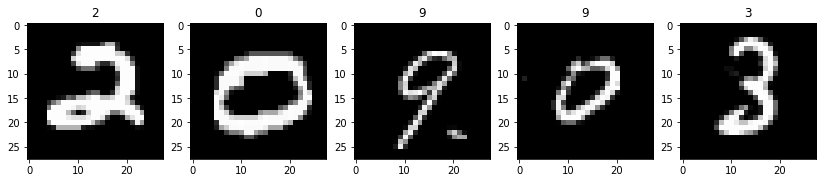

In [28]:
fig = plt.figure(figsize=(20, 10))
for i, img in enumerate(test_img[0:5,:,:,0], 1):
    subplot = fig.add_subplot(1, 7, i)
    plt.imshow(img, cmap='gray');
    subplot.set_title('%s' % pred_test[i - 1]);

In [29]:
with open('submit_CNN_v3.txt', 'w') as dst:
    dst.write('ImageId,Label\n')
    for i, p in enumerate(pred_test, 1):
        dst.write('%s,%s\n' % (i, p))

In [37]:
# Your submission scored 0.98671